# 마르코프 체인 

$P$ 는 마르코프 체인의 전이 확률을 나타내며, 각 상태에서 다음 상태로의 전이 확률을 나타냅니다. 각 행은 현재 상태이고, 각 열은 다음 상태에 대한 확률을 나타낸다.
- 예를 들어, 첫 번째 행은 “맑음(sunny)” 상태에서 다음 상태로 맑음, 흐림, 비의 확률을 각각 0.7, 0.2, 0.1로 나타내고 있다.

이 행렬  $P$ 를 이용하여 마르코프 체인의 다음 상태를 예측하거나, 장기적으로 상태 분포를 계산하는 등의 분석을 할 수 있다.

# 초기값 비일때
- 초기 상태를 "rainy"라고 할때의 각 날씨 상태에서 다음 상태로 전이하는 확률을 계산

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:
P = np.array([[0.7, 0.2, 0.1],  #sunny -> [sunny, cloudy, rainy]
             [0.3, 0.65, 0.05], #cloduy -> [sunny, cloudy, rainy]
             [0.15, 0.35, 0.5]]) #rainy -> [sunny, cloudy, rainy]

In [16]:
using_P = np.array([[P[0][0], P[0][0]+P[0][1], P[0][0]+P[0][1]+P[0][2]],   #sunny -> [sunny, cloudy, rainy]
                    [P[1][0], P[1][0]+P[1][1], P[1][0]+P[1][1]+P[1][2]],   #cloduy -> [sunny, cloudy, rainy]
                    [P[2][0], P[2][0]+P[2][1], P[2][0]+P[2][1]+P[2][2]]])  #rainy -> [sunny, cloudy, rainy]

In [17]:
def MC_weather(N) :
    weather_list = ['2']
    for i in range(N) :
        current_weather = weather_list[-1]
        rd = random.uniform(0, 1)
        if current_weather == '1' :
            if rd <= using_P[0][0] :
                next_weather = '1'
                weather_list.append(next_weather)
            elif using_P[0][0] < rd <= using_P[0][1] :
                next_weather = '2'
                weather_list.append(next_weather)
            elif using_P[0][1] <= rd <= using_P[0][2] :
                next_weather = '3'
                weather_list.append(next_weather)
        elif current_weather == '2' :
            if rd <= using_P[1][0] :
                next_weather = '1'
                weather_list.append(next_weather)
            elif using_P[1][0] < rd <= using_P[1][1] :
                next_weather = '2'
                weather_list.append(next_weather)
            elif using_P[1][1] <= rd <= using_P[1][2] :
                next_weather = '3'
                weather_list.append(next_weather)
        elif current_weather == '3' :
            if rd <= using_P[2][0] :
                next_weather = '1'
                weather_list.append(next_weather)
            elif using_P[2][0] < rd <= using_P[2][1] :
                next_weather = '2'
                weather_list.append(next_weather)
            elif using_P[2][1] <= rd <= using_P[2][2] :
                next_weather = '3'
                weather_list.append(next_weather)
    return weather_list

0 번째 날  0 10000 0
1 번째 날  2999 6486 515
2 번째 날  4090 4994 916
3 번째 날  4471 4434 1095
4 번째 날  4584 4137 1279
5 번째 날  4667 4043 1290
6 번째 날  4750 3945 1305
7 번째 날  4782 3881 1337
8 번째 날  4780 3906 1314
9 번째 날  4836 3871 1293


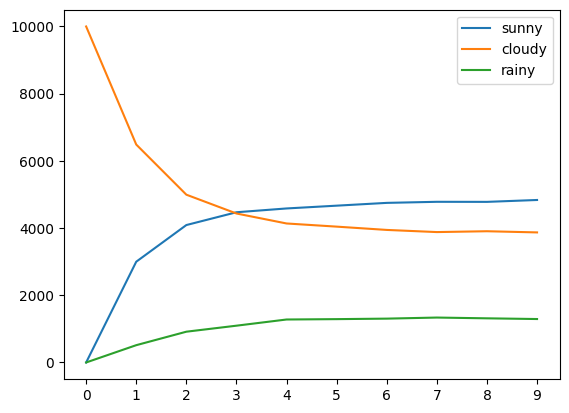

In [18]:
tot_list = []
temp_list = []
for i in range(10000) :
    tot_list.append(MC_weather(10))
b = np.array(tot_list)
for i in range(0, 10) :
    temp_a = list(b[:, i])
    print(i,'번째 날 ', temp_a.count('1'), temp_a.count('2'), temp_a.count('3'))
    temp_list.append([temp_a.count('1'), temp_a.count('2'), temp_a.count('3')])

# t0 = (0.7, 0.2, 0.1) / t10 = (0.5, 0.4, 0.1)
graph = np.array(temp_list)
plt.plot(graph[:,0], label = 'sunny')
plt.plot(graph[:,1], label = 'cloudy')
plt.plot(graph[:,2], label = 'rainy')
plt.xticks(range(10))
plt.legend()
plt.show()

# 문자로 표현

In [6]:
P = np.array([[0.7, 0.2, 0.1],  #sunny -> [sunny, cloudy, rainy]
             [0.3, 0.65, 0.05], #cloduy -> [sunny, cloudy, rainy]
             [0.15, 0.35, 0.5]]) #rainy -> [sunny, cloudy, rainy]

In [7]:
using_P = np.array([[P[0][0], P[0][0]+P[0][1], P[0][0]+P[0][1]+P[0][2]],   #sunny -> [sunny, cloudy, rainy]
                    [P[1][0], P[1][0]+P[1][1], P[1][0]+P[1][1]+P[1][2]],   #cloduy -> [sunny, cloudy, rainy]
                    [P[2][0], P[2][0]+P[2][1], P[2][0]+P[2][1]+P[2][2]]])  #rainy -> [sunny, cloudy, rainy]

In [19]:
def MC_weather(N) :
    weather_list = ['rainy']
    for i in range(N) :
        current_weather = weather_list[-1]
        rd = random.uniform(0, 1)
        if current_weather == 'sunny' :
            if rd <= using_P[0][0] :
                next_weather = 'sunny'
            elif using_P[0][0] < rd <= using_P[0][1] :
                next_weather = 'cloudy'
            elif using_P[0][1] < rd <= using_P[0][2] :
                next_weather = 'rainy'
        elif current_weather == 'cloudy' :
            if rd <= using_P[1][0] :
                next_weather = 'sunny'
            elif using_P[1][0] < rd <= using_P[1][1] :
                next_weather = 'cloudy'
            elif using_P[1][1] < rd <= using_P[1][2] :
                next_weather = 'rainy'
        elif current_weather == 'rainy' :
            if rd <= using_P[2][0] :
                next_weather = 'sunny'
            elif using_P[2][0] < rd <= using_P[2][1] :
                next_weather = 'cloudy'
            elif using_P[2][1] < rd <= using_P[2][2] :
                next_weather = 'rainy'
        weather_list.append(next_weather)
    return weather_list

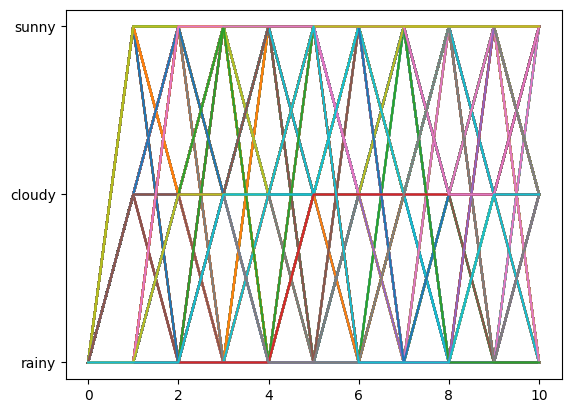

In [20]:
N = 10 #시뮬레이션 횟수


for i in range(1000) :
    plt.plot(range(N + 1), MC_weather(N))

plt.show()